#**Project 6**
#Title: E-commerce Customer Data For Behavior Analysis

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
data=pd.read_csv(r"/content/ecommerce_customer_data_custom_ratios.csv.zip")

In [7]:
data.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,46251,2020-09-08 09:38:32,Electronics,12,3,740,Credit Card,37,0.0,Christine Hernandez,37,Male,0
1,46251,2022-03-05 12:56:35,Home,468,4,2739,PayPal,37,0.0,Christine Hernandez,37,Male,0
2,46251,2022-05-23 18:18:01,Home,288,2,3196,PayPal,37,0.0,Christine Hernandez,37,Male,0
3,46251,2020-11-12 13:13:29,Clothing,196,1,3509,PayPal,37,0.0,Christine Hernandez,37,Male,0
4,13593,2020-11-27 17:55:11,Home,449,1,3452,Credit Card,49,0.0,James Grant,49,Female,1


In [8]:
data.tail()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
249995,33308,2023-08-10 13:39:06,Clothing,279,2,2187,PayPal,55,1.0,Michelle Flores,55,Male,1
249996,48835,2021-11-23 01:30:42,Home,27,1,3615,Credit Card,42,1.0,Jeremy Rush,42,Female,1
249997,21019,2020-07-02 14:04:48,Home,17,5,2466,Cash,41,0.0,Tina Craig,41,Male,0
249998,49234,2020-12-30 02:02:40,Books,398,2,3668,Crypto,34,0.0,Jennifer Cooper,34,Female,1
249999,16971,2021-03-13 16:28:35,Electronics,425,4,2370,Cash,36,1.0,Justin Lawson,36,Female,1


In [9]:
data.describe()

,Customer ID,Product Price,Quantity,Total Purchase Amount,Customer Age,Returns,Age,Churn
count,250000.00000,250000.000000,250000.000000,250000.000000,250000.000000,202404.000000,250000.000000,250000.000000
mean,25004.03624,254.659512,2.998896,2725.370732,43.940528,0.497861,43.940528,0.199496
std,14428.27959,141.568577,1.414694,1442.933565,15.350246,0.499997,15.350246,0.399622
min,1.00000,10.000000,1.000000,100.000000,18.000000,0.000000,18.000000,0.000000
25%,12497.75000,132.000000,2.000000,1477.000000,31.000000,0.000000,31.000000,0.000000
50%,25018.00000,255.000000,3.000000,2724.000000,44.000000,0.000000,44.000000,0.000000
75%,37506.00000,377.000000,4.000000,3974.000000,57.000000,1.000000,57.000000,0.000000
max,50000.00000,500.000000,5.000000,5350.000000,70.000000,1.000000,70.000000,1.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   Payment Method         250000 non-null  object 
 7   Customer Age           250000 non-null  int64  
 8   Returns                202404 non-null  float64
 9   Customer Name          250000 non-null  object 
 10  Age                    250000 non-null  int64  
 11  Gender                 250000 non-null  object 
 12  Churn                  250000 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 24.8+ MB


In [11]:
data.isnull().sum()

,0
Customer ID,0
Purchase Date,0
Product Category,0
Product Price,0
Quantity,0
Total Purchase Amount,0
Payment Method,0
Customer Age,0
Returns,47596
Customer Name,0


In [12]:
data.isna().any()

,0
Customer ID,False
Purchase Date,False
Product Category,False
Product Price,False
Quantity,False
Total Purchase Amount,False
Payment Method,False
Customer Age,False
Returns,True
Customer Name,False


In [13]:
#filling null values
data.fillna(method = "ffill",inplace = True)
print(data.shape)
data.isnull().sum()

<ipython-input-13-e63f716adcd6>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method = "ffill",inplace = True)


(250000, 13)


,0
Customer ID,0
Purchase Date,0
Product Category,0
Product Price,0
Quantity,0
Total Purchase Amount,0
Payment Method,0
Customer Age,0
Returns,0
Customer Name,0


#1.What are the trends in total purchase amount over time (based on Purchase Date)? Are there any seasonal patterns?

In [14]:
data.head(1)
df = data.groupby("Purchase Date")["Total Purchase Amount"].sum().reset_index()
sorted = df.sort_values("Total Purchase Amount",ascending = False)
sorted1 = sorted.head(15)
sorted

,Purchase Date,Total Purchase Amount
146474,2022-03-03 16:35:24,9949
141779,2022-02-06 17:18:39,9823
10325,2020-02-26 00:41:53,9817
44182,2020-08-27 01:16:52,9795
146705,2022-03-05 01:02:19,9621
...,...,...
18089,2020-04-08 07:29:51,105
215386,2023-03-13 18:48:00,103
197630,2022-12-07 03:33:30,101
40407,2020-08-06 16:14:43,100


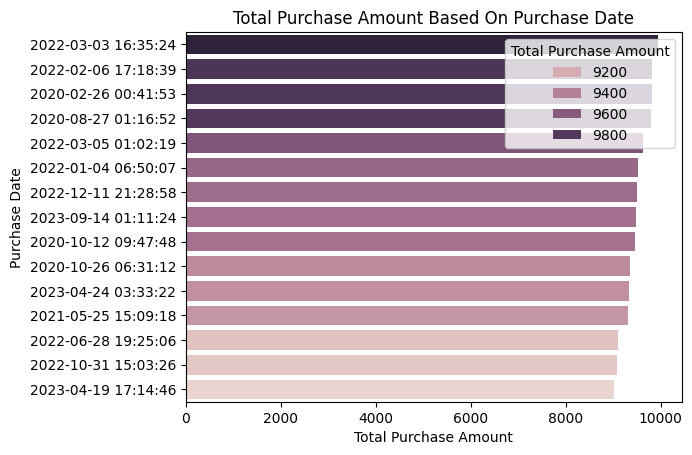

In [15]:
sns.barplot(sorted1,y = "Purchase Date",x = "Total Purchase Amount",hue = "Total Purchase Amount")
plt.title("Total Purchase Amount Based On Purchase Date")
plt.show()

#2.Which product categories generate the highest revenue and which are the most popular based on quantity purchased?

In [16]:
df = data.groupby("Product Category")["Product Price"].sum().reset_index()
sorted = df.sort_values("Product Price", ascending=False)
sorted

,Product Category,Product Price
1,Clothing,19096701
0,Books,19080772
2,Electronics,12783292
3,Home,12704113


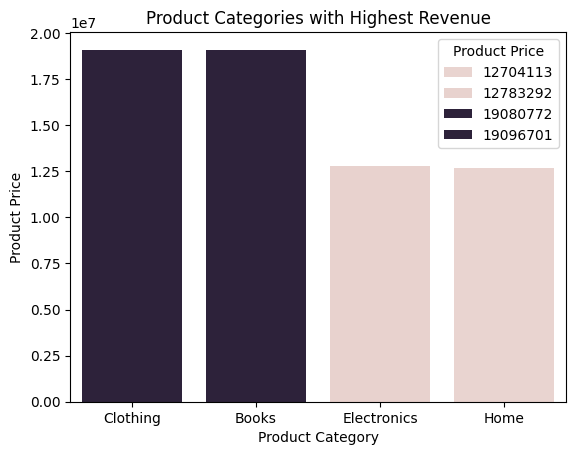

In [17]:
sns.barplot(data = sorted,x = "Product Category",y = "Product Price",hue = "Product Price")
plt.title("Product Categories with Highest Revenue")
plt.show()


In [18]:
df = data.groupby("Product Category")["Quantity"].sum().reset_index()
sorted = df.sort_values("Quantity",ascending = False)
sorted

,Product Category,Quantity
1,Clothing,225322
0,Books,223876
2,Electronics,150828
3,Home,149698


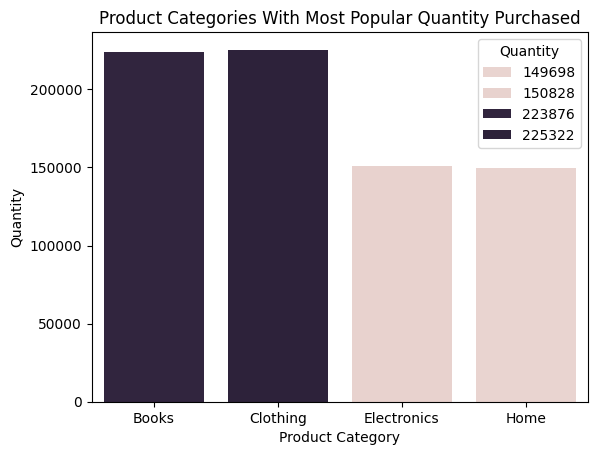

In [19]:
sns.barplot(data = df,x = "Product Category",y = "Quantity",hue = "Quantity")
plt.title("Product Categories With Most Popular Quantity Purchased")
plt.show()

#3) What are the most popular payment methods, and how do they relate to the total purchase amount or frequency of purchases?

In [20]:

df = data.groupby("Payment Method")["Total Purchase Amount"].sum().reset_index()
sorted = df.sort_values("Total Purchase Amount",ascending = False)
sorted

,Payment Method,Total Purchase Amount
1,Credit Card,274152396
3,PayPal,204026613
0,Cash,135705551
2,Crypto,67458123


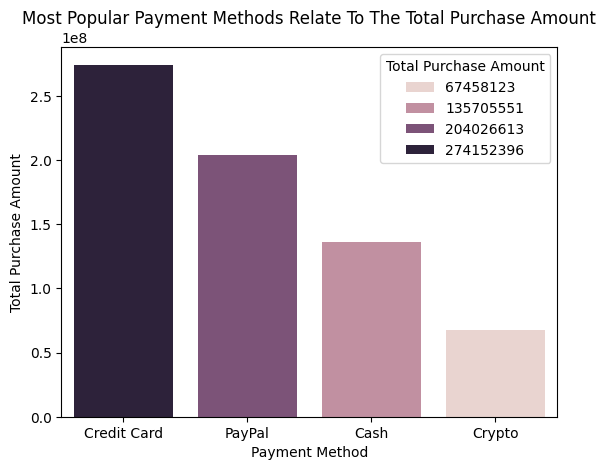

In [21]:
sns.barplot(data = sorted,x = "Payment Method",y = "Total Purchase Amount",hue = "Total Purchase Amount")
plt.title("Most Popular Payment Methods Relate To The Total Purchase Amount")
plt.show()


#4) Who are the top customers by total purchase amount or frequency, based on Customer ID and Customer Name?

In [22]:
df = data.groupby("Customer ID")["Total Purchase Amount"].sum().reset_index()
sorted = df.sort_values("Total Purchase Amount",ascending = False)
sorted1 = sorted.head(15)
sorted

,Customer ID,Total Purchase Amount
36211,36437,55339
39561,39817,51718
26818,26977,48497
5809,5844,46541
3555,3576,46518
...,...,...
37138,37371,167
33040,33238,162
13215,13297,157
1374,1382,153


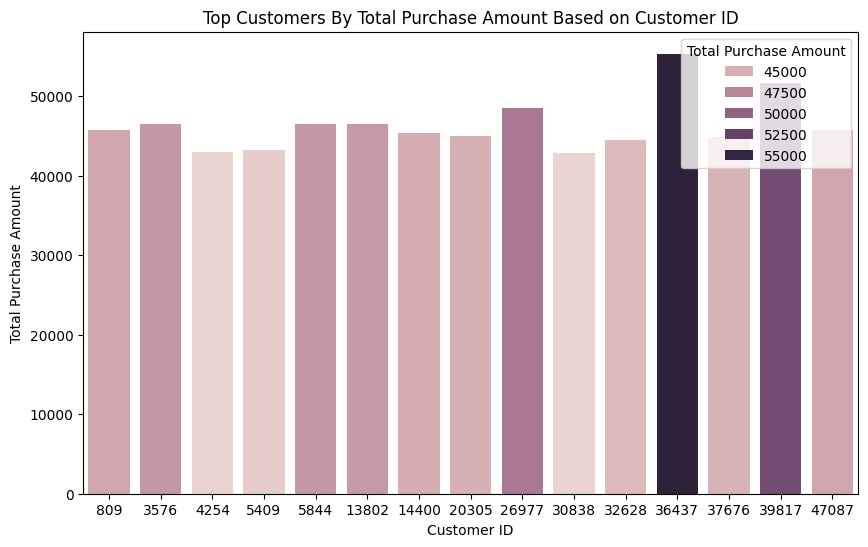

In [23]:
plt.figure(figsize = (10,6))
sns.barplot(data = sorted1,x = "Customer ID",y = "Total Purchase Amount",hue = "Total Purchase Amount")
plt.title("Top Customers By Total Purchase Amount Based on Customer ID")
plt.show()
